In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import itertools
import community as community_louvain
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Generate graphs of 2-hop neighbourhood
def graph_gen(nodeid, G):
    
    num_hops = 2  
    nodes = []
    edges = []
    #Get small graph nodes
    nodes = nx.single_source_shortest_path_length(G, nodeid, cutoff=num_hops).keys() 
    graph = nx.ego_graph(G,nodeid, num_hops, center=True,undirected = True)
    #Get small graph edges
    edges = [e for e in graph.edges]
    plot_node_types(graph)
    print('nodeid',nodeid)
    print('node count',len(nodes))
    print('edge count',len(edges))
    return graph

In [4]:
def get_node_degree(G):
    #Adding node degree
    for node in G.nodes():
        d = G.degree(node)
        G.nodes[node]["degree"] = d
    return G

In [5]:
def plot_node_types(G):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen', 3: 'orange'}

    nx.draw(G, 
        with_labels=False, node_color=[color_class_map[node[1]['class']] 
                        for node in G.nodes(data=True)], 
            node_size=200,
        font_color='white')
    plt.show()

In [6]:
def plot_partition(G,partition):
    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,label=True,
                            cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [7]:
def detect_community(G):
    partition = community_louvain.best_partition(G)
    plot_partition(G,partition)

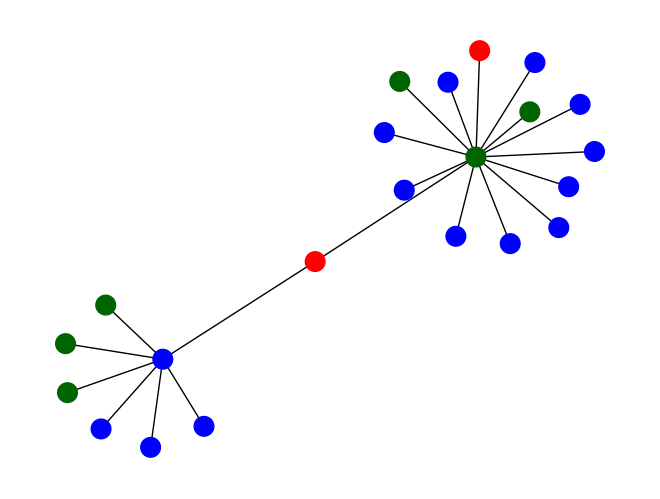

nodeid 3
node count 22
edge count 21


In [8]:
G_syn_dblp = nx.read_gexf("DBLP_four_area_hgen.gexf")
node_subset_syn = dict((n,d['degree']) for n,d in get_node_degree(G_syn_dblp).nodes().items() if d['degree']>=2)
node_id = list(node_subset_syn.keys())[0]
twohop = graph_gen(node_id, G_syn_dblp)

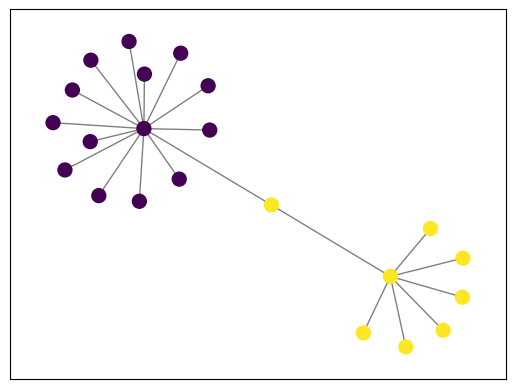

[{'4975', '4647', '8617', '424', '9256', '6157', '5772', '5580', '5810', '5741', '6728', '6856', '4601', '8140'}, {'6001', '3', '5077', '8331', '7902', '5173', '4622', '8955'}]


In [9]:
detect_community(twohop)
list_com= nx.community.louvain_communities(twohop, seed=123)
print(list_com)

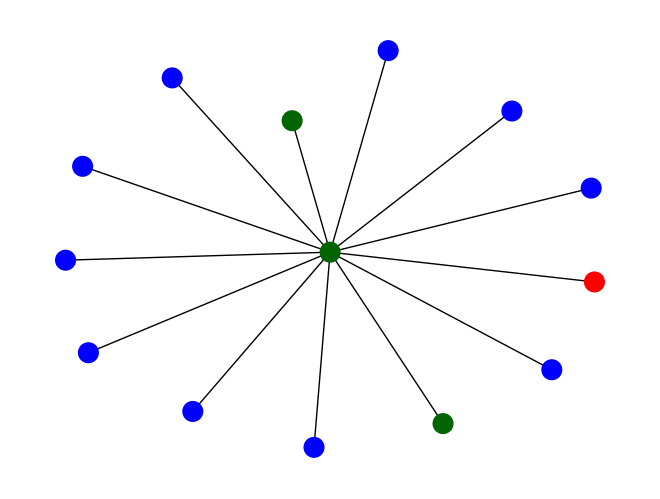

In [10]:
#Largest substructure
H = twohop.subgraph(max(list_com, key=len))
plot_node_types(H)

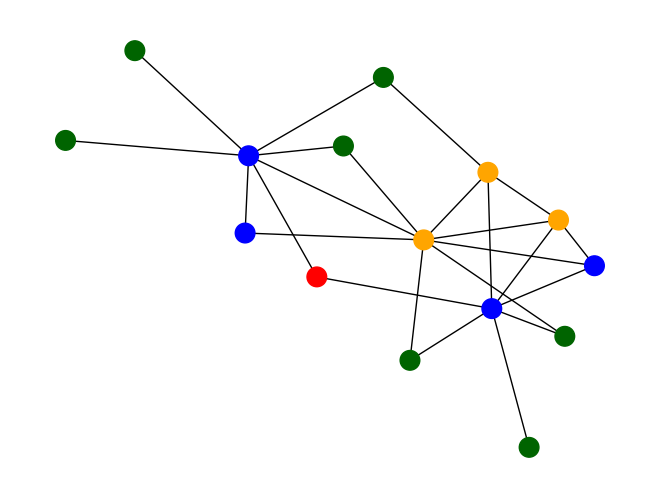

nodeid 101
node count 15
edge count 24


In [11]:
node_id = list(node_subset_syn.keys())[3]
twohop = graph_gen(node_id, G_syn_dblp)

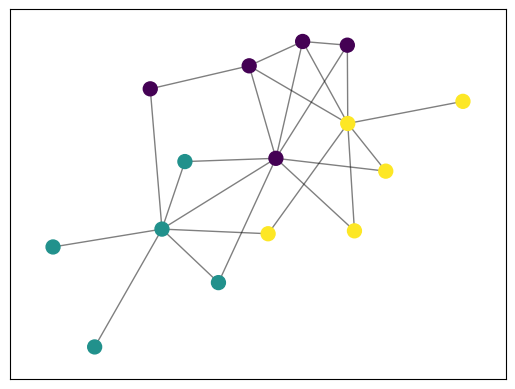

[{'101', '11237', '4652', '4819', '8421', '10260'}, {'7659', '11236'}, {'8467', '7789', '11239', '5882', '6743', '8173', '8923'}]


In [12]:
detect_community(twohop)
list_com= nx.community.louvain_communities(twohop, seed=123)
print(list_com)

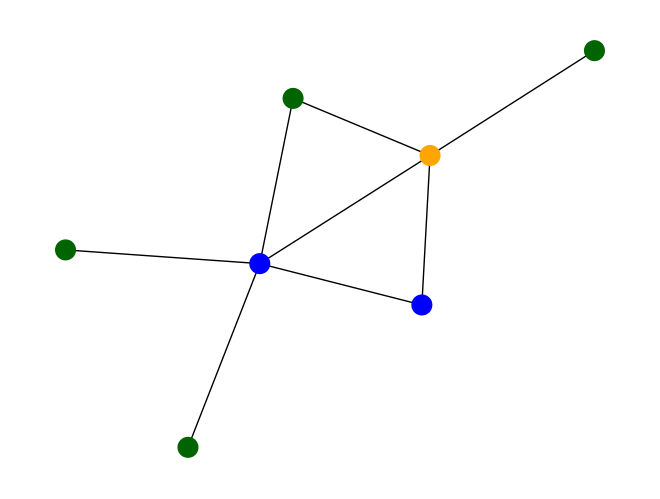

In [13]:
H = twohop.subgraph(max(list_com, key=len))
plot_node_types(H)

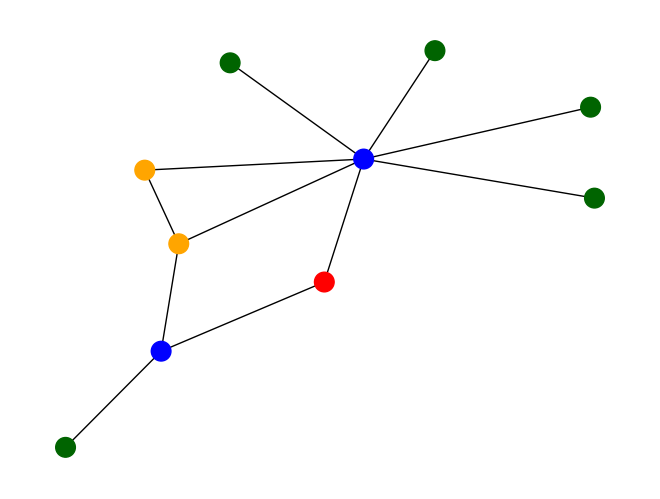

nodeid 123
node count 10
edge count 11


In [14]:
node_id = list(node_subset_syn.keys())[4]
twohop = graph_gen(node_id, G_syn_dblp)

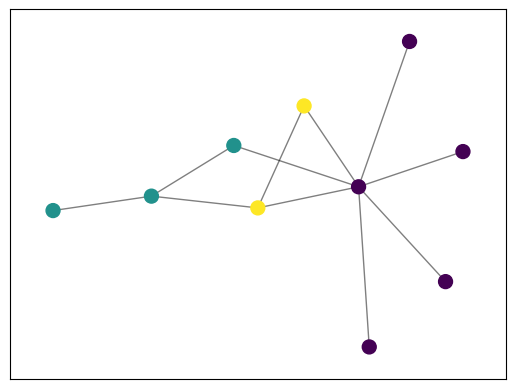

[{'8448', '10328', '6306', '8313', '8973'}, {'123', '6681', '10409'}, {'11237', '11239'}]


In [15]:
detect_community(twohop)
list_com= nx.community.louvain_communities(twohop, seed=123)
print(list_com)

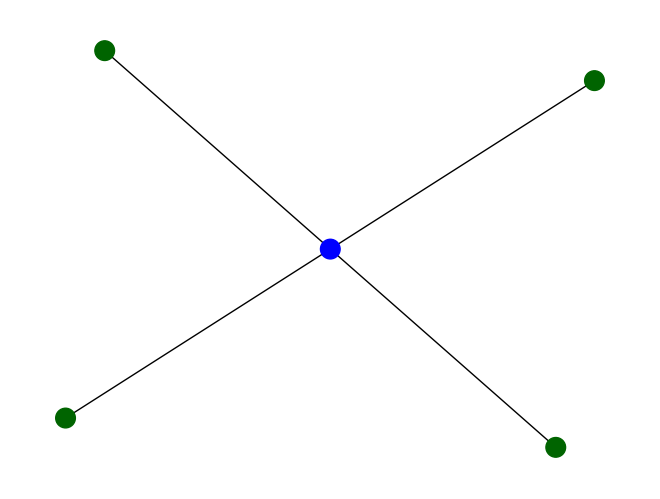

In [16]:
H = twohop.subgraph(max(list_com, key=len))
plot_node_types(H)

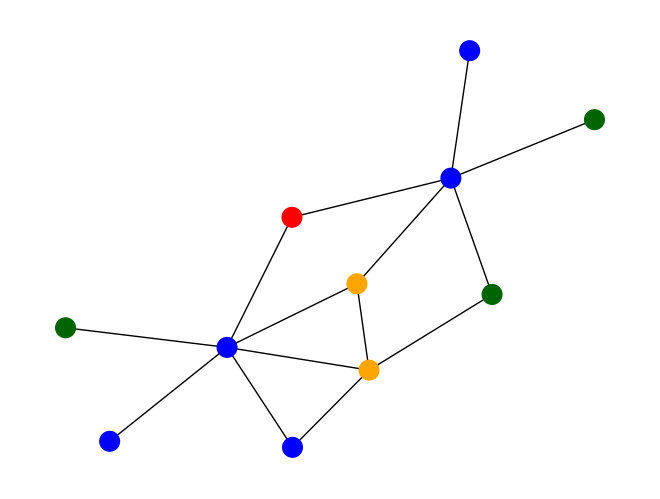

nodeid 128
node count 11
edge count 14


In [17]:
node_id = list(node_subset_syn.keys())[5]
twohop = graph_gen(node_id, G_syn_dblp)

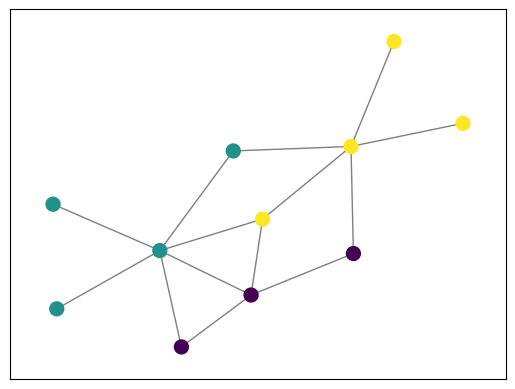

[{'10943', '4666', '11238', '4932'}, {'5800', '9025', '5766', '128'}, {'6668', '8617', '11239'}]


In [18]:
detect_community(twohop)
list_com= nx.community.louvain_communities(twohop, seed=123)
print(list_com)

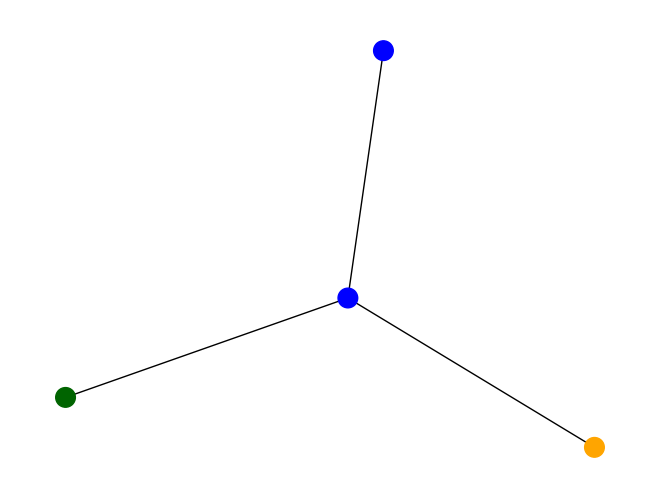

In [19]:
H = twohop.subgraph(max(list_com, key=len))
plot_node_types(H)